# Problem Statment:
### what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

#### Serial No. (Unique row ID)
#### GRE Scores (out of 340)
#### TOEFL Scores (out of 120)
#### University Rating (out of 5)
#### Statement of Purpose and Letter of Recommendation Strength (out of 5)
#### Undergraduate GPA (out of 10)
#### Research Experience (either 0 or 1)
#### Chance of Admit (ranging from 0 to 1)

In [1]:
# Importing some important library

In [62]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

In [63]:
# Loading the Dataset which downloaded from kaggle

In [64]:
df = pd.read_csv("Jamboree_Admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [65]:
df.shape

(500, 9)

In [67]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [68]:
# Dropping the columns which is not required

In [69]:
df = df.drop(['Serial No.'], axis = 'columns')

In [70]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [71]:
# Checking for the null values 

In [72]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [73]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [74]:
# changing the name of columns .

In [75]:
#df = df.rename(columns={'old1': 'new1', 'old2': 'new2'})
df.columns  = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research','Chance_of_Admit']

In [76]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [77]:
df.LOR.unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [78]:
df1 = df 

In [79]:
df1

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [82]:
df1.dtypes

GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

In [83]:
df1[df1.GRE_Score < 300].head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
27,298,98,2,1.5,2.5,7.50,1,0.44
28,295,93,1,2.0,2.0,7.20,0,0.46
36,299,106,2,4.0,4.0,8.40,0,0.64
57,298,99,2,4.0,2.0,7.60,0,0.46
78,296,95,2,3.0,2.0,7.54,1,0.44


In [84]:
df1.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [85]:

for col in df1.columns:
    len_before = len(col)
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR
    len_after = len(df1[(df1[col]<lowerbound) | (df1[col]>upperbound)])
#print(f"outliers in {col}:")
    print(f"{col} : {(len_before - len_after)/len_before} % outliers")
    

GRE_Score : 1.0 % outliers
TOEFL_Score : 1.0 % outliers
University_Rating : 1.0 % outliers
SOP : 1.0 % outliers
LOR : 0.6666666666666666 % outliers
CGPA : 1.0 % outliers
Research : 1.0 % outliers
Chance_of_Admit : 0.8666666666666667 % outliers


In [86]:
# so there is not much outliers

In [87]:
# checking the heatmap for correlation 

<Axes: >

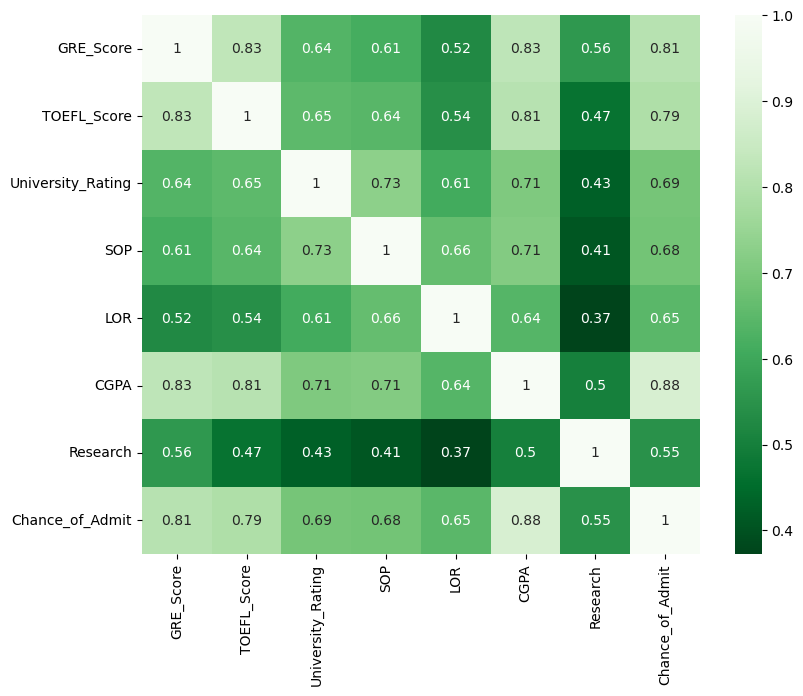

In [88]:
plt.figure(figsize = (9,7))
sns.heatmap(df1.corr(),annot=True , cmap = 'Greens_r')

In [89]:
# Chance of addmission has the good correlation with "University rating" ,"CGPA","TOEFL_Score", "Research"

In [90]:
df1.shape

(500, 8)

In [91]:
# So now we all set for model building

In [92]:
X = df1.drop("Chance_of_Admit" , axis = "columns")
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [93]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X = scaler.fit_transform(X)

In [94]:
Y = df1.Chance_of_Admit
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance_of_Admit, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 10)

In [96]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train , Y_train)
lr_clf.score(X_test , Y_test)

/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be rem

0.7970912596375871

In [97]:
# so this is a good score but let us check how would our model will perform on unseen data .

In [98]:
# K-fold cross validation . 

In [99]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [100]:
cv =  ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0 )
cross_val_score(LinearRegression(),X,Y,cv = cv)

/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be rem

array([0.7664049 , 0.79448035, 0.84526796, 0.78667932, 0.83815024])

In [101]:
# let's try some other teqnique

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [103]:
def find_best_model_using_GridSearchCV(X,Y):
    algos = {'linear_regression':
            {'model':LinearRegression(),'params':{}},
            'Lasso':
            {'model':Lasso(),'params':{'alpha':(0.01, 0.1, 1, 10, 100),'selection':['random' , 'cyclic']}},
            'decision_tree':
            {'model':DecisionTreeRegressor(),'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}}}
    scores = []
    cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'],config['params'] , cv = cv , return_train_score = False)
        gs.fit(X,Y)
        scores.append({'model': algo_name,'best_score': gs.best_score_ , 'best_params': gs.best_params_})
    return pd.DataFrame(scores , columns = ['model','best_score','best_params'])
find_best_model_using_GridSearchCV(X,Y)

/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be rem

,model,best_score,best_params
0,linear_regression,0.806197,{}
1,Lasso,0.750333,"{'alpha': 0.01, 'selection': 'cyclic'}"
2,decision_tree,0.590899,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [104]:
df1.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [111]:
def predicted_chance(GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research):
    #feature_names = X.columns.tolist()
    values = [[GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research]]
    prediction = lr_clf.predict(values)
    return prediction[0]

In [112]:
# Example input values
GRE_Score = 300       #340
TOEFL_Score = 100      #120
University_Rating = 4
SOP = 3
LOR = 3.5
CGPA = 6.5
Research = 0

# Call the function with the example input
chance_of_admit = predicted_chance(GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research)

# Print the predicted chance of admission
print(f"Predicted Chance of Admission: {chance_of_admit:.2f}")

Predicted Chance of Admission: 0.42


/Users/manishachoudhary/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Now exporting this data 

In [115]:
import pickle
with open('Chance_of_admit', 'wb') as f :
    pickle.dump(lr_clf,f)

In [121]:
import json
column_names = X.columns.tolist()
# Create a dictionary with only column names
columns = {'data_columns': column_names}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))